In [1]:
import itertools
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

# load data
summary = pickle.load(open('crossval_summary2.pickle', 'rb'))
results = pickle.load(open('crossval_results2.pickle', 'rb'))

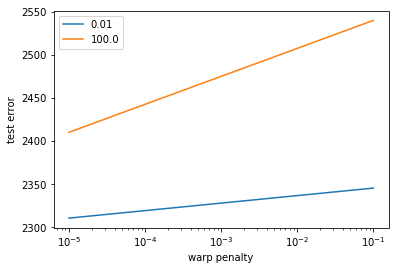

In [2]:
mean_test_error = summary['test_error'].mean(axis=-1)
plt.plot(summary['warp_penalties'][:, 0], mean_test_error)
plt.xscale('log')
plt.legend(summary['time_penalties'][0])
plt.ylabel('test error')
plt.xlabel('warp penalty')

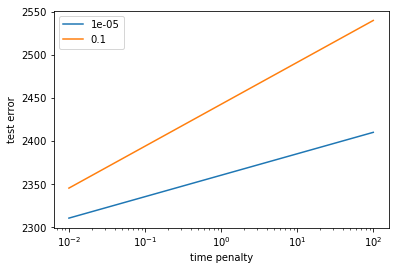

In [3]:
mean_test_error = summary['test_error'].mean(axis=-1).T
plt.plot(summary['time_penalties'][0], mean_test_error)
plt.xscale('log')
plt.legend(summary['warp_penalties'][:,0])
plt.ylabel('test error')
plt.xlabel('time penalty')

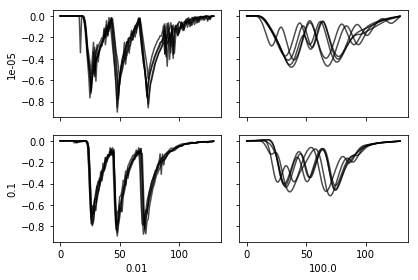

In [4]:
gridshape = summary['warp_penalties'].shape
fig, axes = plt.subplots(*gridshape, sharex=True, sharey=True)
for i, j in itertools.product(*[range(s) for s in gridshape]):
    [axes[i,j].plot(r['params']['time'], '-k', alpha=0.7) for r in results[i, j]]
    if j == 0:
        axes[i,j].set_ylabel(summary['warp_penalties'][i, j])
    if i == gridshape[0]-1:
        axes[i,j].set_xlabel(summary['time_penalties'][i, j])
plt.tight_layout()

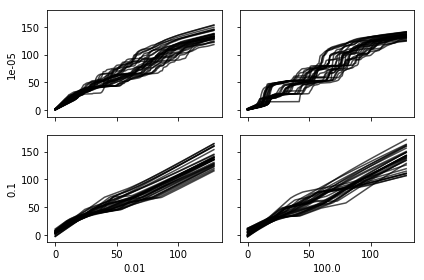

In [5]:
gridshape = summary['warp_penalties'].shape
fig, axes = plt.subplots(*gridshape, sharex=True, sharey=True)
for i, j in itertools.product(*[range(s) for s in gridshape]):
    axes[i,j].plot(results[i, j][0]['params']['warp'][:30].T, '-k', alpha=0.7)
    if j == 0:
        axes[i,j].set_ylabel(summary['warp_penalties'][i, j])
    if i == gridshape[0]-1:
        axes[i,j].set_xlabel(summary['time_penalties'][i, j])
plt.tight_layout()